In [1]:
import numpy as np
import pandas as pd
import glob
from matplotlib import pyplot as plt

import sys
sys.path.insert(0, '..')
sys.path.insert(0, '../../util')

import helper as hp

In [19]:
dataset_to_labels = {
    'cifar10': ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'],
    
    'utkface': ['0-15', '15-25', '25-40', '40-60', '60+'],
    
    'adience': ['0-2', '4-6', '8-13', '15-20', '25-32', '38-43', '48-53', '60-'],
    
    'cifar100': ['beaver', 'dolphin', 'otter', 'seal', 'whale',
        'aquarium_fish', 'flatfish', 'ray', 'shark', 'trout',
        'orchid', 'poppy', 'rose', 'sunflower', 'tulip',
        'bottle', 'bowl', 'can', 'cup', 'plate',
        'apple', 'mushroom', 'orange', 'pear', 'sweet_pepper',
        'clock', 'keyboard', 'lamp', 'telephone', 'television',
        'bed', 'chair', 'couch', 'table', 'wardrobe',
        'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',
        'bear', 'leopard', 'lion', 'tiger', 'wolf',
        'bridge', 'castle', 'house', 'road', 'skyscraper',
        'cloud', 'forest', 'mountain', 'plain', 'sea',
        'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',
        'fox', 'porcupine', 'possum', 'raccoon', 'skunk',
        'crab', 'lobster', 'snail', 'spider', 'worm',
        'baby', 'boy', 'girl', 'man', 'woman',
        'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',
        'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel',
        'maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree',
        'bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train',
        'lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor'],
    
    'cifar100super': ['aquatic_mammals', 'fish', 'flowers', 'food_containers',
        'fruit_and_vegetables', 'household_electrical_devices',
        'household_furniture', 'insects', 'large_carnivores',
        'large_man-made_outdoor_things', 'large_natural_outdoor_scenes',
        'large_omnivores_and_herbivores', 'medium_mammals',
        'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals',
        'trees', 'vehicles_1', 'vehicles_2']
}

dataset_to_root_dir = {
    'cifar10': '/NS/twitter-7/work/vnanda/adversarial_disparity/microsoft-smoothing/code/cifar10',
    'utkface': '/NS/twitter-7/work/vnanda/adversarial_disparity/microsoft-smoothing/code/utkface',
    'adience': '/NS/twitter-7/work/vnanda/adversarial_disparity/microsoft-smoothing/code/adience',
    'cifar100': '/NS/twitter-7/work/vnanda/adversarial_disparity/microsoft-smoothing/code/cifar100',
    'cifar100super': '/NS/twitter-7/work/vnanda/adversarial_disparity/microsoft-smoothing/code/cifar100super'
}

dataset_to_sens_attrs = {
    'cifar10': ['label'],
    'utkface': ['label', 'gender', 'race'],
    'adience': ['label', 'gender'],
    'cifar100': ['label'],
    'cifar100super': ['label']
}

dataset_to_model_names = {
    'utkface': ['utk_classifier', 'resnet', 'alexnet', 'vgg', 'densenet', 'squeezenet'],
    'cifar10': ['deep_cnn', 'pyramidnet', 'resnet', 'vgg', 'densenet', 'squeezenet'],
    'cifar100': ['deep_cnn_cifar100', 'pyramidnet', 'resnet', 'vgg', 'densenet', 'squeezenet'],
    'cifar100super': ['deep_cnn_cifar100', 'pyramidnet', 'resnet', 'vgg', 'densenet', 'squeezenet'],
    'adience': ['adience_classifier', 'resnet', 'alexnet', 'vgg', 'densenet', 'squeezenet']
}

In [91]:
dataset = 'cifar100super'
labels = dataset_to_labels[dataset]
root_dir = dataset_to_root_dir[dataset]
sens_attrs = dataset_to_sens_attrs[dataset]
models = dataset_to_model_names[dataset]
# lb_files = glob.glob('{}/*'.format(root_dir))
lb_files = ['{}/{}_output'.format(root_dir, m) for m in models]
lb_files_epoch_0 = ['{}/{}_epoch_0_output'.format(root_dir, m) for m in models]

paper_friendly_plots = True

COLORS = ['blue', 'red', 'green', 'orange', 'magenta', 'yellow', 'black', 'grey', 'cyan']

In [92]:
ds_obj, datasets, data_loaders = \
    hp.get_data_loder_objects(dataset, ['test'], root_dir='..', **hp.get_loader_kwargs(batch_size=100))

Files already downloaded and verified
Files already downloaded and verified


In [93]:
lb_files, lb_files_epoch_0

(['/NS/twitter-7/work/vnanda/adversarial_disparity/microsoft-smoothing/code/cifar100super/deep_cnn_cifar100_output',
  '/NS/twitter-7/work/vnanda/adversarial_disparity/microsoft-smoothing/code/cifar100super/pyramidnet_output',
  '/NS/twitter-7/work/vnanda/adversarial_disparity/microsoft-smoothing/code/cifar100super/resnet_output',
  '/NS/twitter-7/work/vnanda/adversarial_disparity/microsoft-smoothing/code/cifar100super/vgg_output',
  '/NS/twitter-7/work/vnanda/adversarial_disparity/microsoft-smoothing/code/cifar100super/densenet_output',
  '/NS/twitter-7/work/vnanda/adversarial_disparity/microsoft-smoothing/code/cifar100super/squeezenet_output'],
 ['/NS/twitter-7/work/vnanda/adversarial_disparity/microsoft-smoothing/code/cifar100super/deep_cnn_cifar100_epoch_0_output',
  '/NS/twitter-7/work/vnanda/adversarial_disparity/microsoft-smoothing/code/cifar100super/pyramidnet_epoch_0_output',
  '/NS/twitter-7/work/vnanda/adversarial_disparity/microsoft-smoothing/code/cifar100super/resnet_epoch

In [94]:
def set_paper_friendly_plots_params():
    plt.style.use('seaborn-paper')
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.labelsize'] = 22
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['axes.titlesize'] = 15
    plt.rcParams['axes.linewidth'] = 1.25
    plt.rcParams['xtick.labelsize'] = 16
    plt.rcParams['ytick.labelsize'] = 16
    plt.rcParams['legend.fontsize'] = 20
    plt.rcParams['figure.titlesize'] = 22
    plt.rcParams['lines.linewidth'] = 4.0
    plt.rcParams['grid.color'] = 'grey'
    plt.rcParams['grid.linestyle'] = '--'
    plt.rcParams['grid.linewidth'] = 0.25
    plt.rcParams['figure.dpi'] = 50
    plt.rcParams['savefig.dpi'] = 50

In [95]:
heatmaps_for_sens_attrs, heatmaps_for_sens_attrs_epoch_0, x_labels, x_labels_epoch_0 = [], [], [], []

for sens_attr in sens_attrs:
    
    if sens_attr == 'gender':

        heatmaps_for_sens_attrs.append(np.zeros((len(models), len(ds_obj.genders))))
        heatmaps_for_sens_attrs_epoch_0.append(np.zeros((len(models), len(ds_obj.genders))))

        x_labels.append([ds_obj.get_image_protected_id_to_label(_id, 'gender') for _id in ds_obj.genders])
        x_labels_epoch_0.append([ds_obj.get_image_protected_id_to_label(_id, 'gender') for _id in ds_obj.genders])

    elif sens_attr == 'race':
        
        heatmaps_for_sens_attrs.append(np.zeros((len(models), len(ds_obj.races))))
        heatmaps_for_sens_attrs_epoch_0.append(np.zeros((len(models), len(ds_obj.races))))
        
        x_labels.append([ds_obj.get_image_protected_id_to_label(_id, 'race') for _id in ds_obj.races])
        x_labels_epoch_0.append([ds_obj.get_image_protected_id_to_label(_id, 'race') for _id in ds_obj.races])

    elif sens_attr == 'label':
        
        heatmaps_for_sens_attrs.append(np.zeros((len(models), len(ds_obj.classes))))
        heatmaps_for_sens_attrs_epoch_0.append(np.zeros((len(models), len(ds_obj.classes))))
        
        x_labels.append(ds_obj.classes)
        x_labels_epoch_0.append(ds_obj.classes)

    else:
        raise ValueError('Sens attr {} not supported!'.format(sens_attr))

In [96]:
x_labels, x_labels_epoch_0

([['aquatic_mammals',
   'fish',
   'flowers',
   'food_containers',
   'fruit_and_vegetables',
   'household_electrical_devices',
   'household_furniture',
   'insects',
   'large_carnivores',
   'large_man-made_outdoor_things',
   'large_natural_outdoor_scenes',
   'large_omnivores_and_herbivores',
   'medium_mammals',
   'non-insect_invertebrates',
   'people',
   'reptiles',
   'small_mammals',
   'trees',
   'vehicles_1',
   'vehicles_2']],
 [['aquatic_mammals',
   'fish',
   'flowers',
   'food_containers',
   'fruit_and_vegetables',
   'household_electrical_devices',
   'household_furniture',
   'insects',
   'large_carnivores',
   'large_man-made_outdoor_things',
   'large_natural_outdoor_scenes',
   'large_omnivores_and_herbivores',
   'medium_mammals',
   'non-insect_invertebrates',
   'people',
   'reptiles',
   'small_mammals',
   'trees',
   'vehicles_1',
   'vehicles_2']])

In [97]:
for model_idx, file in enumerate(lb_files):
    for heatmap_idx, sens_attr in enumerate(sens_attrs):
        df = pd.read_csv(file, sep='\t')
        print (len(df))
        try:
            df = df[df['label'] == df['base_prediction']] # take only correct predictions
        except:
            df = df[df['label'] == df['base']] # take only correct predictions
        print (len(df))
        unique, counts = np.unique(df['label'].to_numpy(), return_counts=True)
        print (dict(zip(unique, counts)))
        range_lb = np.linspace(np.min(df['radius']), np.max(df['radius']), 100)
        
        if paper_friendly_plots:
            set_paper_friendly_plots_params()
        
        for idx, attr in enumerate(np.unique(df[sens_attr].to_numpy())):
            minority_radii, majority_radii = df['radius'][df[sens_attr] == attr], \
                df['radius'][df[sens_attr] != attr]
            minority_cdf_vals = np.array([np.sum(minority_radii > t)/len(minority_radii) for t in range_lb])
            majority_cdf_vals = np.array([np.sum(majority_radii > t)/len(majority_radii) for t in range_lb])
            dt = range_lb[1] - range_lb[0]
            minority_auc = np.sum(minority_cdf_vals * dt)
            majority_auc = np.sum(majority_cdf_vals * dt)
            
            if sens_attr == 'label':
                y_coord = int(attr)
            else:
                y_coord = ds_obj.get_image_protected_label_to_id(attr, sens_attr)

            heatmaps_for_sens_attrs[heatmap_idx][model_idx, y_coord] = (minority_auc - majority_auc)/majority_auc

for model_idx, file in enumerate(lb_files_epoch_0):
    for heatmap_idx, sens_attr in enumerate(sens_attrs):
        df = pd.read_csv(file, sep='\t')
        print (len(df))
        try:
            df = df[df['label'] == df['base_prediction']] # take only correct predictions
        except:
            df = df[df['label'] == df['base']] # take only correct predictions
        print (len(df))
        unique, counts = np.unique(df['label'].to_numpy(), return_counts=True)
        print (file.split('/')[-1], dict(zip(unique, counts)))
        range_lb = np.linspace(np.min(df['radius']), np.max(df['radius']), 100)
        
        if paper_friendly_plots:
            set_paper_friendly_plots_params()
        
        for idx, attr in enumerate(np.unique(df[sens_attr].to_numpy())):
            minority_radii, majority_radii = df['radius'][df[sens_attr] == attr], \
                df['radius'][df[sens_attr] != attr]
            minority_cdf_vals = np.array([np.sum(minority_radii > t)/len(minority_radii) for t in range_lb])
            majority_cdf_vals = np.array([np.sum(majority_radii > t)/len(majority_radii) for t in range_lb])
            dt = range_lb[1] - range_lb[0]
            minority_auc = np.sum(minority_cdf_vals * dt)
            majority_auc = np.sum(majority_cdf_vals * dt)
            
            if sens_attr == 'label':
                y_coord = int(attr)
            else:
                y_coord = ds_obj.get_image_protected_label_to_id(attr, sens_attr)
            
            sigma = (minority_auc - majority_auc)/majority_auc
            heatmaps_for_sens_attrs_epoch_0[heatmap_idx][model_idx, y_coord] = sigma \
                if not np.isnan(sigma) else 0.

2000
1422
{0: 72, 1: 68, 2: 84, 3: 80, 4: 79, 5: 68, 6: 71, 7: 56, 8: 65, 9: 83, 10: 90, 11: 71, 12: 51, 13: 80, 14: 90, 15: 46, 16: 58, 17: 90, 18: 62, 19: 58}
2000
1349
{0: 49, 1: 75, 2: 71, 3: 72, 4: 86, 5: 58, 6: 68, 7: 53, 8: 64, 9: 84, 10: 78, 11: 60, 12: 55, 13: 74, 14: 76, 15: 52, 16: 59, 17: 88, 18: 65, 19: 62}
2000
1330
{0: 49, 1: 67, 2: 77, 3: 84, 4: 75, 5: 67, 6: 61, 7: 55, 8: 60, 9: 78, 10: 78, 11: 64, 12: 56, 13: 66, 14: 78, 15: 51, 16: 46, 17: 87, 18: 66, 19: 65}
871
674
{0: 28, 1: 32, 2: 32, 3: 44, 4: 38, 5: 32, 6: 39, 7: 20, 8: 33, 9: 45, 10: 45, 11: 30, 12: 19, 13: 25, 14: 44, 15: 35, 16: 28, 17: 36, 18: 28, 19: 41}
80
58
{0: 2, 1: 3, 2: 1, 3: 4, 4: 3, 5: 5, 6: 4, 7: 2, 8: 1, 9: 4, 10: 4, 11: 1, 12: 5, 13: 4, 14: 2, 15: 2, 16: 2, 17: 3, 18: 2, 19: 4}
529
296
{0: 10, 1: 21, 2: 14, 3: 19, 4: 18, 5: 14, 6: 9, 7: 9, 8: 8, 9: 23, 10: 23, 11: 18, 12: 10, 13: 9, 14: 16, 15: 8, 16: 13, 17: 22, 18: 9, 19: 23}
1599
127
deep_cnn_cifar100_epoch_0_output {0: 12, 2: 35, 4: 1, 8: 3,

In [98]:
heatmaps_for_sens_attrs[0].shape[1]

20

In [99]:
heatmaps_for_sens_attrs

[array([[-0.22901787,  0.07412822,  0.24002937, -0.12867986,  0.11765717,
         -0.12726512, -0.04352012, -0.05513812, -0.40928742, -0.05017405,
          0.31805513, -0.43126215,  0.12199262,  0.00668355,  0.00380747,
          0.03838155, -0.33404481,  0.52103116,  0.00108083,  0.1559376 ],
        [-0.32240723,  0.03782067,  0.54458614, -0.21853387,  0.20140933,
         -0.03118157, -0.10987745,  0.03621083, -0.21843707,  0.03293778,
          0.31175644, -0.52272335, -0.00453255, -0.23189446, -0.00382844,
         -0.00382127, -0.56617055,  0.64665869, -0.01358895,  0.03281054],
        [-0.04130195,  0.04078218,  0.28271655,  0.04734284,  0.12275567,
          0.04553566,  0.06152167, -0.00667968, -0.18792075, -0.05189337,
          0.21365123, -0.23992376, -0.12479427, -0.12781818,  0.04709125,
         -0.24434367, -0.43066567,  0.34698283, -0.0298307 , -0.13088775],
        [-0.23519783, -0.07553645,  0.41580106, -0.173822  ,  0.28065794,
         -0.06064802,  0.018671  , 

## Plotting the heatmaps

In [100]:
from matplotlib.gridspec import GridSpec
from matplotlib import colors

['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']
['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']


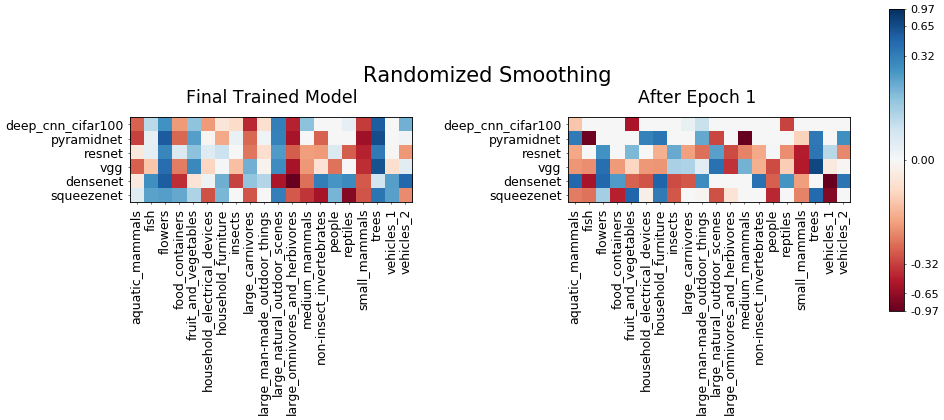

In [101]:
op_filename = '{}_lbs_heatmap'.format(dataset)

if dataset == 'utkface':
    fig = plt.figure(figsize=(20,8))
    gs = GridSpec(1, 7, width_ratios=[10., 4., 10., 10., 10., 4., 10.])

    axes = [fig.add_subplot(gs[0]), fig.add_subplot(gs[1]), fig.add_subplot(gs[2])]
    axes_epoch_0 = [fig.add_subplot(gs[4]), fig.add_subplot(gs[5]), fig.add_subplot(gs[6])]

elif dataset == 'adience':
    fig = plt.figure(figsize=(20,8))
    gs = GridSpec(1, 5, width_ratios=[10., 2.5, 5., 10., 2.5])
    axes = [fig.add_subplot(gs[0]), fig.add_subplot(gs[1])]
    axes_epoch_0 = [fig.add_subplot(gs[3]), fig.add_subplot(gs[4])]

elif dataset == 'cifar10':
    fig = plt.figure(figsize=(20,8))
    gs = GridSpec(1, 3, width_ratios=[10., 2.5, 10.])
    axes = [fig.add_subplot(gs[0])]
    axes_epoch_0 = [fig.add_subplot(gs[2])]

elif dataset == 'cifar100super':
    fig = plt.figure(figsize=(20,8))
    gs = GridSpec(1, 3, width_ratios=[10., 2.5, 10.])
    axes = [fig.add_subplot(gs[0])]
    axes_epoch_0 = [fig.add_subplot(gs[2])]

elif dataset == 'cifar100':
    fig = plt.figure(figsize=(30,10))
    gs = GridSpec(3, 1, height_ratios=[10, 1., 10])
    axes = [fig.add_subplot(gs[0])]
    axes_epoch_0 = [fig.add_subplot(gs[2])]


pcms = []

m = np.max([np.max(np.abs(hm)) for hm in heatmaps_for_sens_attrs + heatmaps_for_sens_attrs_epoch_0])

for (idx, heatmap), x_label in zip(enumerate(heatmaps_for_sens_attrs), x_labels):
    print (x_label)
    pcms.append(axes[idx].imshow(heatmap, cmap='RdBu', 
                     norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03, vmin=-m, vmax=m)))
    axes[idx].set_xticks(range(len(x_label)))
    axes[idx].set_xticklabels(x_label, rotation=90, fontsize=18)
    axes[idx].set_yticks(range(heatmap.shape[0]))
    if idx == 0:
        axes[idx].set_yticklabels(models, fontsize=18)
    else:
        axes[idx].set_yticklabels([])

for (idx, heatmap), x_label in zip(enumerate(heatmaps_for_sens_attrs_epoch_0), x_labels_epoch_0):
    print (x_label)
    pcms.append(axes_epoch_0[idx].imshow(heatmap, cmap='RdBu', 
                     norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03, vmin=-m, vmax=m)))
    axes_epoch_0[idx].set_xticks(range(len(x_label)))
    axes_epoch_0[idx].set_xticklabels(x_label, rotation=90, fontsize=18)
    axes_epoch_0[idx].set_yticks(range(heatmap.shape[0]))
    if idx == 0:
        axes_epoch_0[idx].set_yticklabels(models, fontsize=18)
    else:
        axes_epoch_0[idx].set_yticklabels([])

        
cbar = plt.colorbar(pcms[0], ax=axes + axes_epoch_0, use_gridspec=True, 
                    fraction=0.02, ticks=np.linspace(-m, m, 7))
cbar.ax.set_yticklabels(['{:.2f}'.format(x) for x in np.linspace(-m, m, 7)], fontsize=16)

# fig.suptitle("Final Trained Model", fontsize=30)

if dataset == 'utkface':
    heading_coordinate = (3, -3)
    subplot_1_coordinate = (-5., -1.5)
    subplot_2_coordinate = (-4.5, -1.5)
    axis_1, axis_2 = axes[1], axes_epoch_0[1]
elif dataset == 'adience':
    heading_coordinate = (1, -3)
    subplot_1_coordinate = (-7., -1.5)
    subplot_2_coordinate = (-6.7, -1.5)
    axis_1, axis_2 = axes[1], axes_epoch_0[1]
elif dataset == 'cifar10':
    heading_coordinate = (7, -3)
    subplot_1_coordinate = (1.5, -1.5)
    subplot_2_coordinate = (2, -1.5)
    axis_1, axis_2 = axes[0], axes_epoch_0[0]
elif dataset == 'cifar100super':
    heading_coordinate = (16, -3)
    subplot_1_coordinate = (3.5, -1.5)
    subplot_2_coordinate = (4.5, -1.5)
    axis_1, axis_2 = axes[0], axes_epoch_0[0]
elif dataset == 'cifar100':
    heading_coordinate = (35, -5)
    subplot_1_coordinate = (38.5, -1.5)
    subplot_2_coordinate = (41.5, -1.5)
    axis_1, axis_2 = axes[0], axes_epoch_0[0]

    
axis_1.text(*heading_coordinate, 
              "Randomized Smoothing",
              fontsize=30)
axis_1.text(*subplot_1_coordinate, 
              "Final Trained Model",
              fontsize=25)
axis_2.text(*subplot_2_coordinate, 
              "After Epoch 1",
              fontsize=25)


file_format = 'pdf' if paper_friendly_plots else 'png'
        
plt.savefig('{}/{}.{}'.format(dataset, op_filename, file_format), bbox_inches='tight')
plt.show()